# DEVELOPMENT OF AN AI-DRIVEN MODEL TO ENHANCE ATHLETE PERFORMANCE IN SPORTS

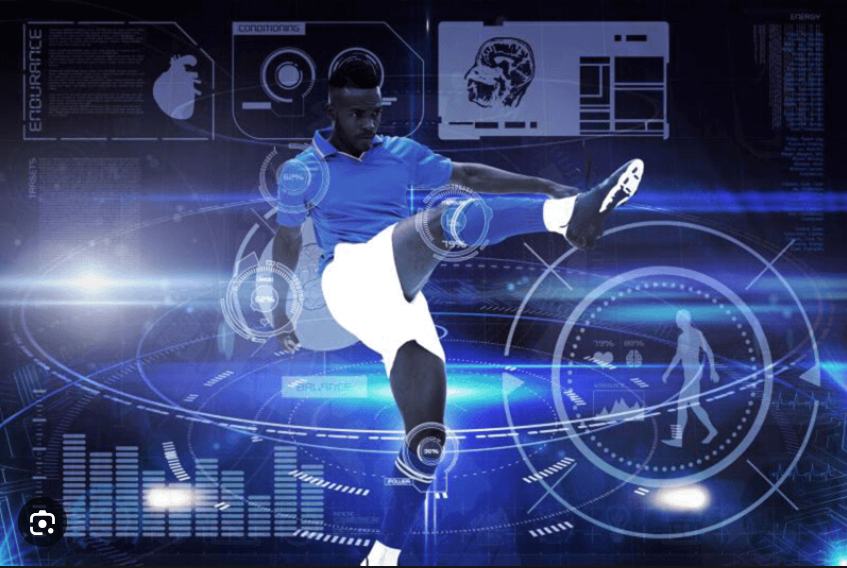

## Dataset Info.

This dataset is designed to analyze the impact of complex scheduling algorithms on injury rates and athletic performance in a collegiate sports environment.

It provides data for athletes, capturing their demographics, training regimes, schedules, fatigue levels, and injury risks.

#### Features Overview

__Age:__ The age of the athlete, which can impact performance and recovery.

__Gender:__ The gender of the athlete, providing insights into demographic differences.

__Height_cm:__ The height of the athlete in centimeters, a factor that may influence position and performance.

__Weight_kg:__ The weight of the athlete in kilograms, another physical characteristic related to performance.

__Position:__ The playing position of the athlete (e.g., Center, Forward, Guard), which may correlate with performance metrics.

__Training_Intensity:__ A score representing the intensity of the athlete's training, reflecting the level of effort and stress during workouts.

__Training_Hours_Per_Week:__ The number of hours dedicated to training each week, a critical factor in performance outcomes.

__Recovery_Days_Per_Week:__ The number of days allocated for recovery each week, essential for optimal performance and injury prevention.

__Match_Count_Per_Week:__ The number of matches played per week, indicating competition exposure.

__Rest_Between_Events_Days:__ The rest days between competitive events, impacting fatigue and recovery.

__Fatigue_Score:__ A subjective score reflecting the athlete's fatigue level, which can influence performance.

__Performance_Score:__ An objective score quantifying the athlete's performance level in their sport.

__Team_Contribution_Score__: A score reflecting the athlete's contribution to the team's overall performance.

__Load_Balance_Score:__ A measure indicating how well the athlete manages training load and recovery.

__ACL_Risk_Score:__ A score assessing the risk of anterior cruciate ligament (ACL) injuries, crucial for injury prevention.

__Injury_Indicator:__ A binary variable indicating whether the athlete has experienced an injury.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

In [2]:
# Load the dataset 
df = pd.read_csv("collegiate_athlete_injury_dataset.csv")

In [3]:
df.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,72,0
2,A003,22,Male,164,83,Guard,8,8,2,1,3,6,59,61,100,62,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,79,52,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,52,84,49,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                10000 non-null  object
 1   Age                       10000 non-null  int64 
 2   Gender                    10000 non-null  object
 3   Height_cm                 10000 non-null  int64 
 4   Weight_kg                 10000 non-null  int64 
 5   Position                  10000 non-null  object
 6   Training_Intensity        10000 non-null  int64 
 7   Training_Hours_Per_Week   10000 non-null  int64 
 8   Recovery_Days_Per_Week    10000 non-null  int64 
 9   Match_Count_Per_Week      10000 non-null  int64 
 10  Rest_Between_Events_Days  10000 non-null  int64 
 11  Fatigue_Score             10000 non-null  int64 
 12  Performance_Score         10000 non-null  int64 
 13  Team_Contribution_Score   10000 non-null  int64 
 14  Load_Balance_Score     

## 1. Data Cleaning

In [5]:
# Check for missing values and duplicates
missing_values = df.isnull().sum()
duplicate_count = df.duplicated().sum()

In [6]:
# Display missing values and duplicate count
missing_values

Athlete_ID                  0
Age                         0
Gender                      0
Height_cm                   0
Weight_kg                   0
Position                    0
Training_Intensity          0
Training_Hours_Per_Week     0
Recovery_Days_Per_Week      0
Match_Count_Per_Week        0
Rest_Between_Events_Days    0
Fatigue_Score               0
Performance_Score           0
Team_Contribution_Score     0
Load_Balance_Score          0
ACL_Risk_Score              0
Injury_Indicator            0
dtype: int64

In [7]:
duplicate_count

759

* No Missing Values – The dataset is complete with no missing data.
* 759 Duplicate Rows Found – These need to be removed to avoid bias in model training.

In [8]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates().reset_index(drop=True)

# Verify the number of duplicates after removal
remaining_duplicates = df_cleaned.duplicated().sum()

# Display the result
remaining_duplicates, df_cleaned.shape


(0, (9241, 17))

In [9]:
# Check data types of each column
print(df_cleaned.dtypes)


Athlete_ID                  object
Age                          int64
Gender                      object
Height_cm                    int64
Weight_kg                    int64
Position                    object
Training_Intensity           int64
Training_Hours_Per_Week      int64
Recovery_Days_Per_Week       int64
Match_Count_Per_Week         int64
Rest_Between_Events_Days     int64
Fatigue_Score                int64
Performance_Score            int64
Team_Contribution_Score      int64
Load_Balance_Score           int64
ACL_Risk_Score               int64
Injury_Indicator             int64
dtype: object


In [10]:
# Check unique values in categorical columns

for col in df_cleaned.select_dtypes(include='object').columns:
    print(f"Unique values in column '{col}': {df_cleaned[col].unique()}")

Unique values in column 'Athlete_ID': ['A001' 'A002' 'A003' 'A004' 'A005' 'A006' 'A007' 'A008' 'A009' 'A010'
 'A011' 'A012' 'A013' 'A014' 'A015' 'A016' 'A017' 'A018' 'A019' 'A020'
 'A021' 'A022' 'A023' 'A024' 'A025' 'A026' 'A027' 'A028' 'A029' 'A030'
 'A031' 'A032' 'A033' 'A034' 'A035' 'A036' 'A037' 'A038' 'A039' 'A040'
 'A041' 'A042' 'A043' 'A044' 'A045' 'A046' 'A047' 'A048' 'A049' 'A050'
 'A051' 'A052' 'A053' 'A054' 'A055' 'A056' 'A057' 'A058' 'A059' 'A060'
 'A061' 'A062' 'A063' 'A064' 'A065' 'A066' 'A067' 'A068' 'A069' 'A070'
 'A071' 'A072' 'A073' 'A074' 'A075' 'A076' 'A077' 'A078' 'A079' 'A080'
 'A081' 'A082' 'A083' 'A084' 'A085' 'A086' 'A087' 'A088' 'A089' 'A090'
 'A091' 'A092' 'A093' 'A094' 'A095' 'A096' 'A097' 'A098' 'A099' 'A100'
 'A101' 'A102' 'A103' 'A104' 'A105' 'A106' 'A107' 'A108' 'A109' 'A110'
 'A111' 'A112' 'A113' 'A114' 'A115' 'A116' 'A117' 'A118' 'A119' 'A120'
 'A121' 'A122' 'A123' 'A124' 'A125' 'A126' 'A127' 'A128' 'A129' 'A130'
 'A131' 'A132' 'A133' 'A134' 'A135' 'A1

## 2. Exploratory Data Analysis

__Goals for This EDA Step:__
1. Understand distribution of numeric features with histograms + KDE plots

2. Explore categorical variables with count plots/bar charts

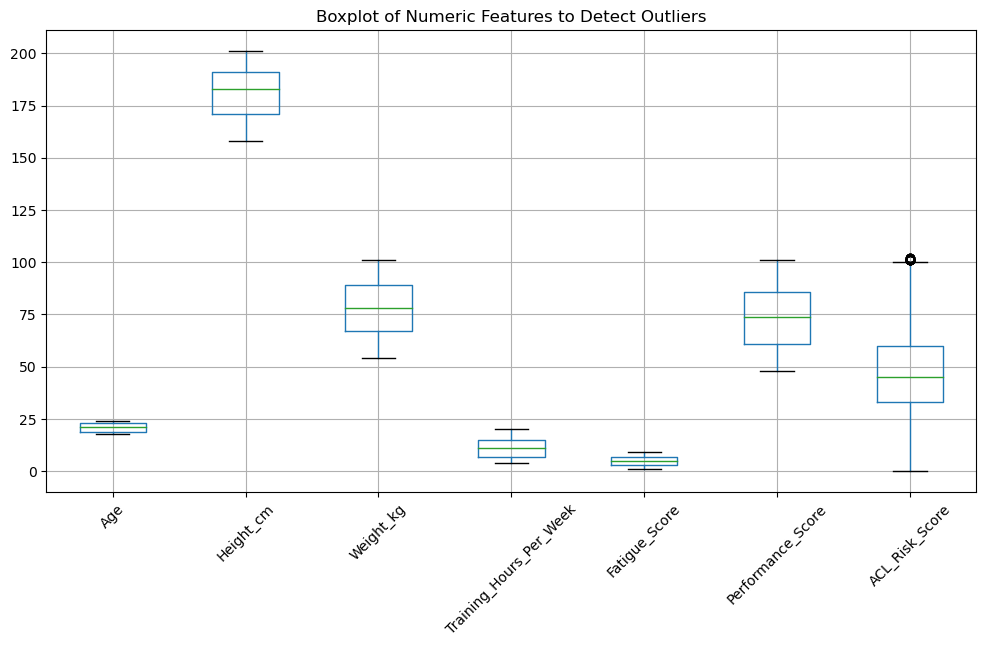

In [11]:
# List of numeric columns to check
numeric_cols = ['Age', 'Height_cm', 'Weight_kg', 'Training_Hours_Per_Week', 
                'Fatigue_Score', 'Performance_Score', 'ACL_Risk_Score']

# Create boxplots
plt.figure(figsize=(12, 6))
df_cleaned[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features to Detect Outliers")
plt.show()


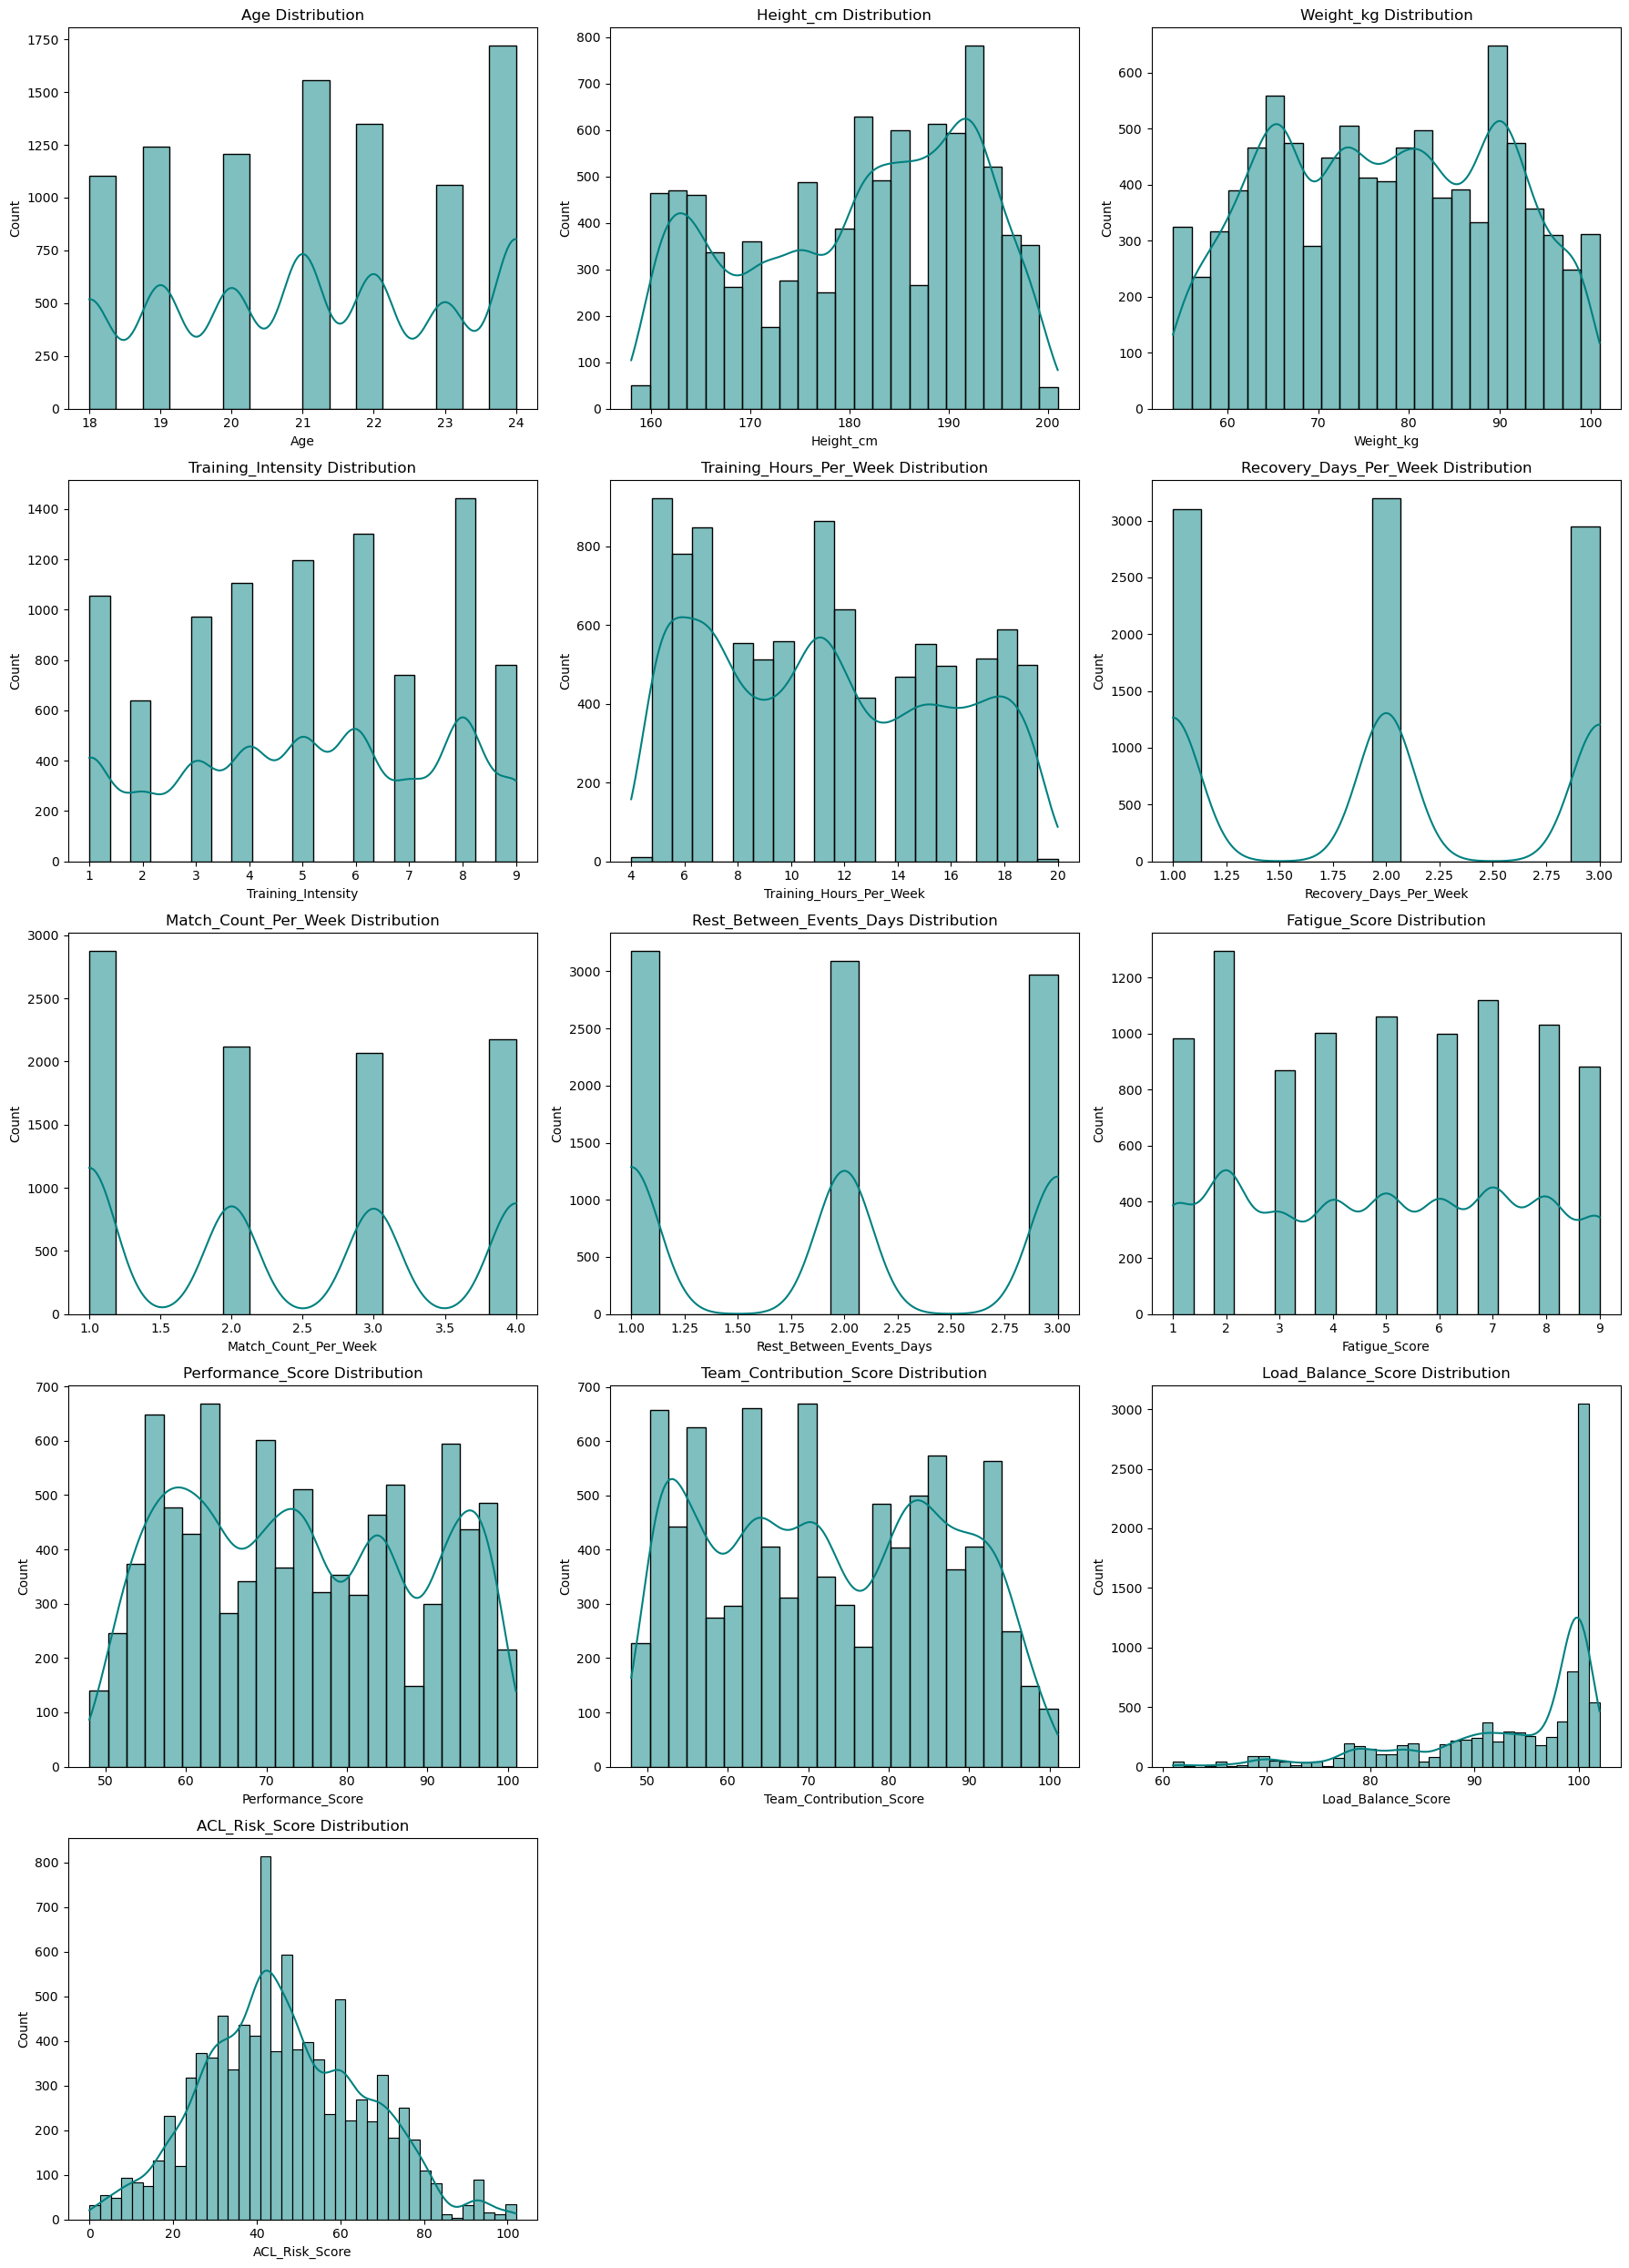

In [12]:
# Plot histograms with KDE
num_cols = ['Age', 'Height_cm', 'Weight_kg', 'Training_Intensity',
            'Training_Hours_Per_Week', 'Recovery_Days_Per_Week',
            'Match_Count_Per_Week', 'Rest_Between_Events_Days', 'Fatigue_Score',
            'Performance_Score', 'Team_Contribution_Score', 'Load_Balance_Score',
            'ACL_Risk_Score']

plt.figure(figsize=(18, 25))
for i, col in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df_cleaned[col], kde=True, color='teal')
    plt.title(f'{col} Distribution')
    plt.tight_layout()
plt.show()


The distribution plots (histogram + KDE) above help us to assess the Skewness, Modality (peaks in distribution), the Spread and potential data issues such as clumping or outliers in our dataset.

The following are the insights we can derive from the above visualizations:
1. __Age:__ The age distribution is fairly distrubuted, it is uniform between 18 and 24, This shows that our dataset includes a balanced age representation typical of collegiate athletes.
2. __Height_cm:__ For the Height column, it is slightly right-skewed, concentrated around 170–190 cm. This is a normal range for athletes; no apparent outliers.
3. __Weight_kg:__ Distribution shows it is bell-shaped; roughly normal. Healthy range for athletic population.
4. __Training_Intensity:__ The distribution in this column is fairly flat; values spread evenly from 1–9. This may suggests variability in how intensity is rated/tracked across athletes.
5.  __Training_Hours_Per_Week:__ This shows a bimodal pattern. It may indicate two types of training groups (e.g., starters vs. reserves).
6. __Recovery_Days_Per_Week:__ This is discrete with integer values (1, 2, 3). This could reflect a structured recovery scheduling
7. __Match_Count_Per_Week:__ This is also discrete; most athletes play 1–4 matches. It represents normal match load for collegiate level.

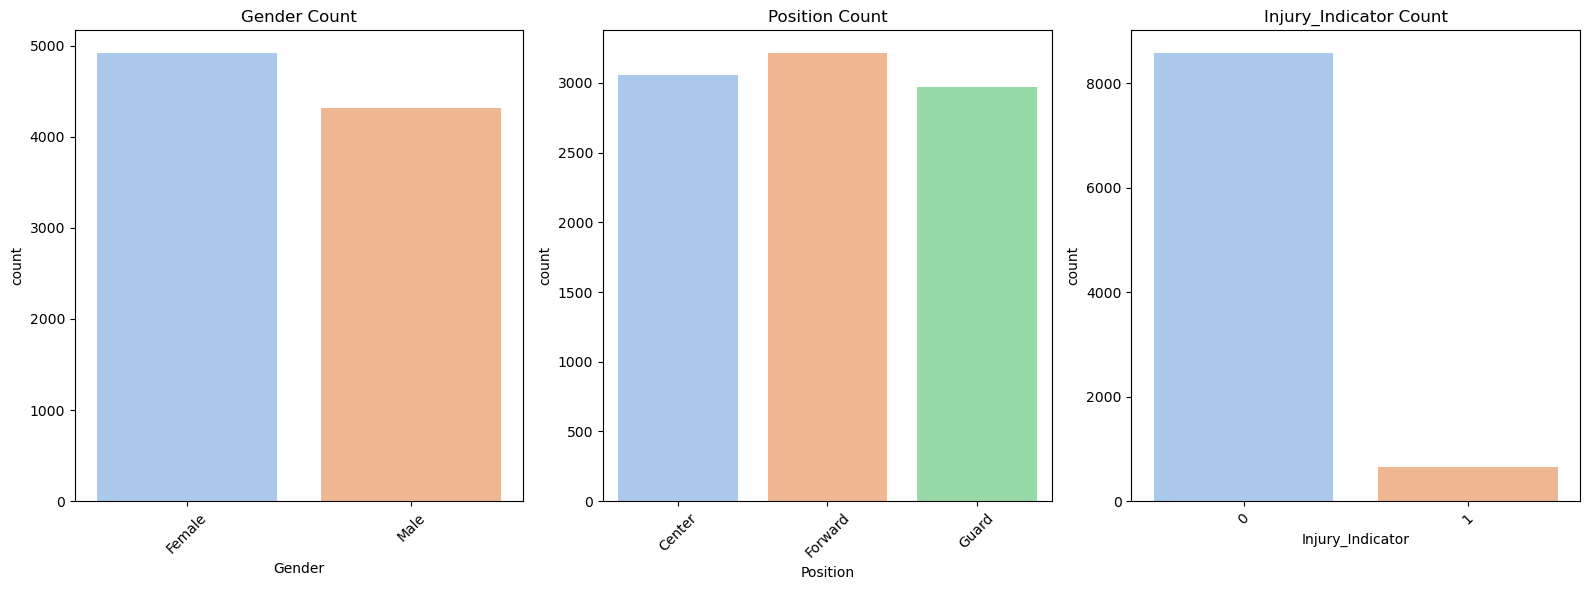

In [13]:
# Plot count plots for categorical features
categorical_cols = ['Gender', 'Position', 'Injury_Indicator']

plt.figure(figsize=(16, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df_cleaned, x=col, palette='pastel')
    plt.title(f"{col} Count")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. For the Gender column it is a fairly balanced distribution, slightly more female athletes than males. This suggests good representation across genders in the dataset.

2. Positions are evenly distributed among Center, Forward, and Guard. It might indicates positional data is not biased and suitable for comparative analysis.

3. Injury Indicator Distribution is highly imbalanced: majority of athletes are not injured (0). Injury cases (1) are significantly fewer — this will require attention during model training with either oversampling or class weighting.



#### Exploring Relationships and Patterns

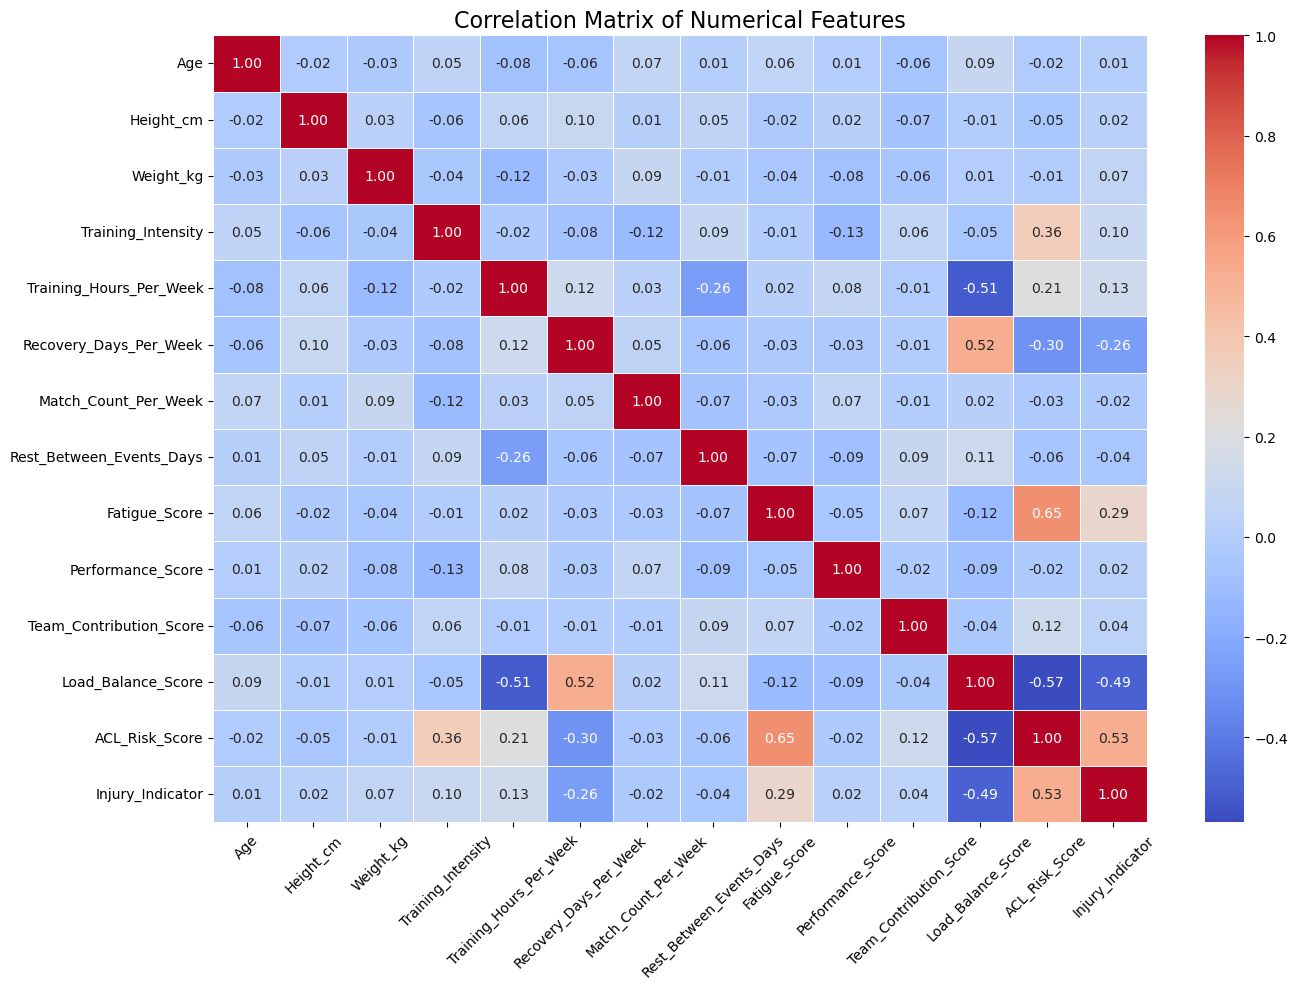

In [14]:
# Compute correlation matrix (numerical features only)
corr_matrix = df_cleaned[num_cols + ['Injury_Indicator']].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Positive Correlations we should note

* __Fatigue_Score and ACL_Risk_Score: 0.65__: This suggests that high fatigue may significantly raise injury risk.

* __Load_Balance_Score and Recovery_Days_Per_Week: 0.52__: This correlation indicates better recovery may improve training balance.

* __Training_Intensity and ACL_Risk_Score: 0.36__: Intense training may be associated with higher injury risk.


#### For Negative Correlations

* __Load_Balance_Score and Training_Hours_Per_Week: -0.51:__ Indicates that more training hours may disrupt training load balance.

* __Injury_Indicator and Load_Balance_Score: -0.49:__ Better load management may reduce injury incidence.

* __Injury_Indicator and Recovery_Days_Per_Week: -0.26__: Recovery time may reduce injury likelihood.

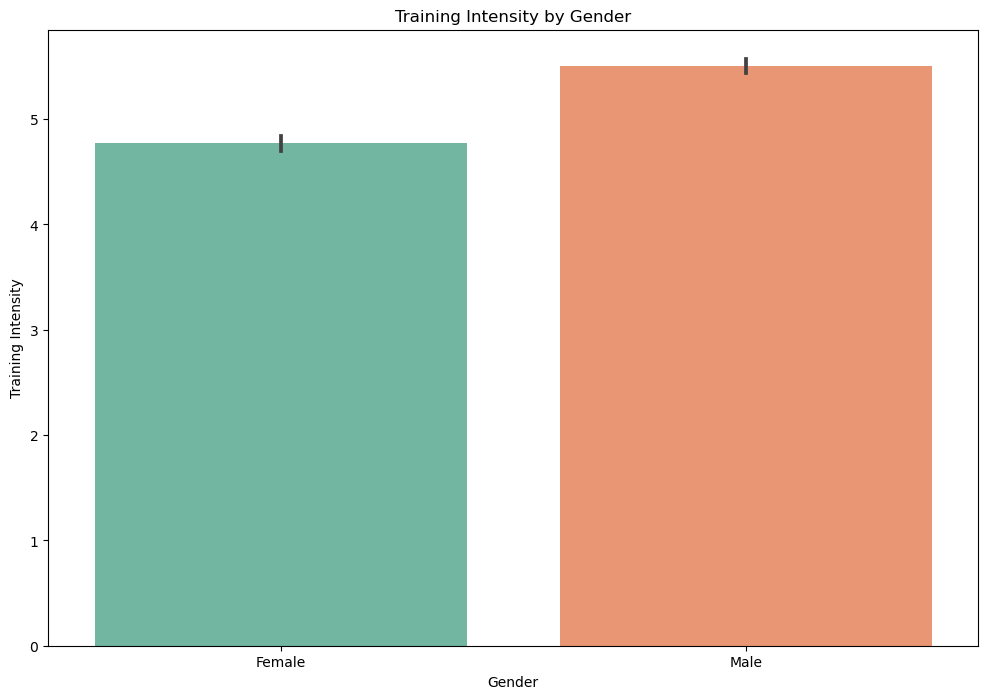

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_cleaned, x='Gender' , y = 'Training_Intensity', palette= 'Set2')
plt.title('Training Intensity by Gender')
plt.xlabel('Gender')
plt.ylabel('Training Intensity')
plt.show()

### Advanced Exploratory Data Analysis

#### 1. Injury-Based Comparative Analysis 

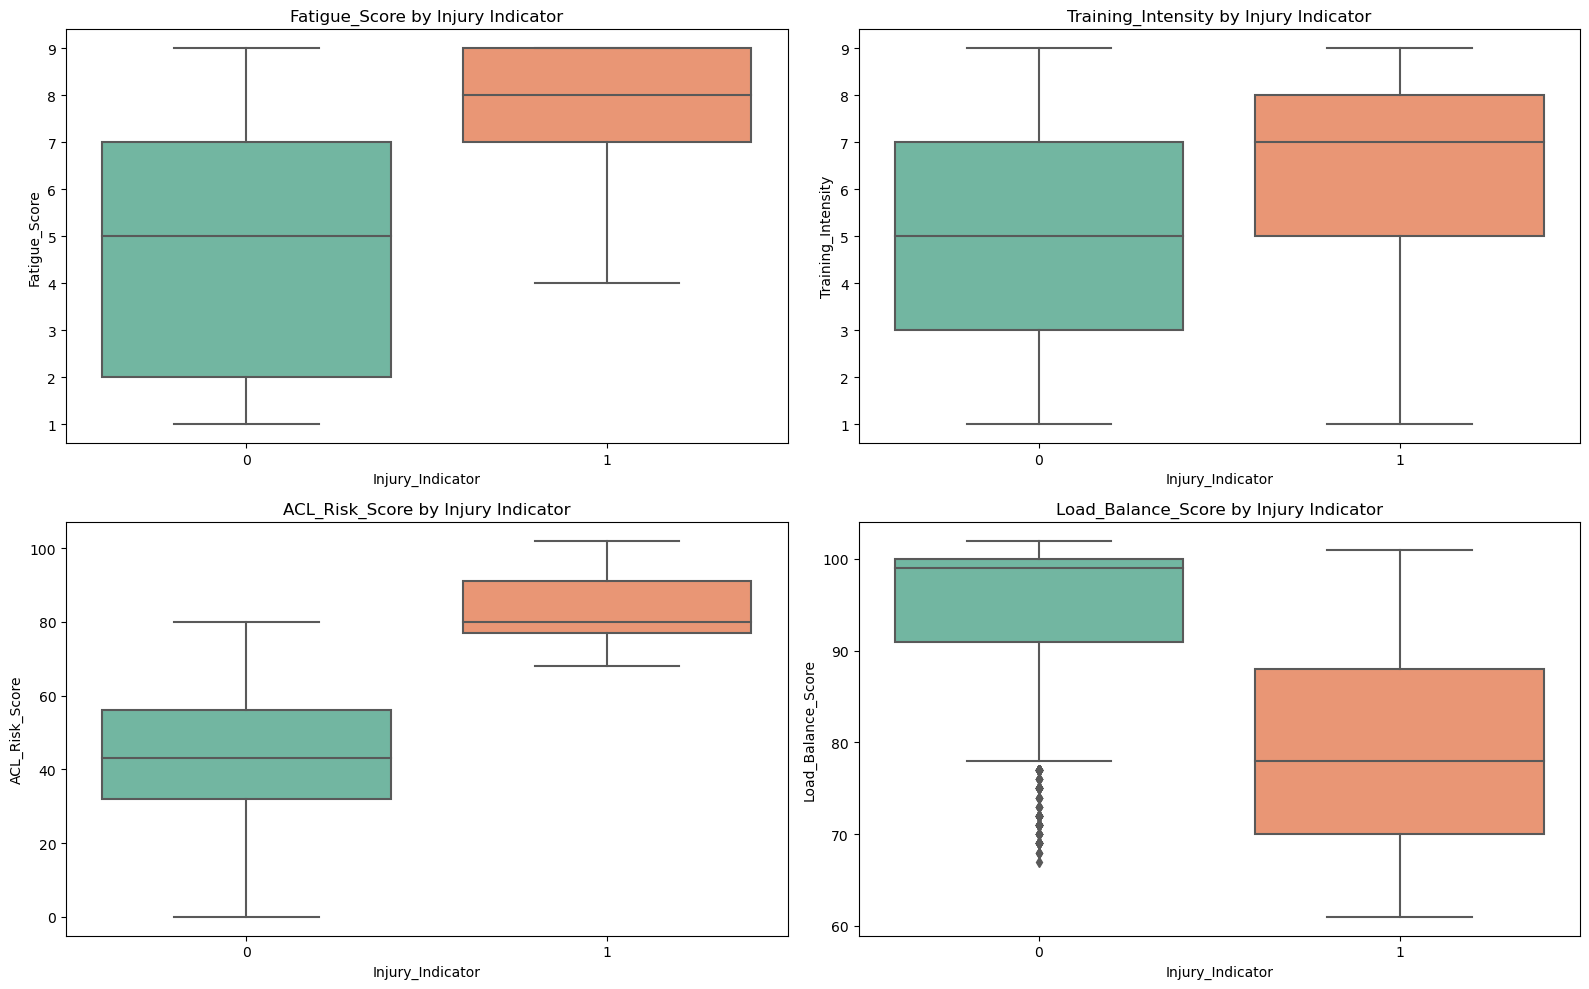

In [16]:
features_to_compare = ['Fatigue_Score', 'Training_Intensity', 'ACL_Risk_Score', 'Load_Balance_Score']

plt.figure(figsize=(16, 10))
for i, col in enumerate(features_to_compare):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Injury_Indicator', y=col, data=df_cleaned, palette='Set2')
    plt.title(f'{col} by Injury Indicator')
plt.tight_layout()
plt.show()

These boxplot visualizations above explore how numerical features differ between injured __`(Injury_Indicator = 1) and non-injured (= 0) athletes.`__

__1. Fatigue Score__: Injured players tend to have higher fatigue scores.
Their values cluster toward the upper range (7–9), while non-injured players show a wider spread.
The implication here is that a high fatigue may be a leading indicator for injury risk.

__2. Training Intensity__: The analysis shows that injured athletes train at consistently higher intensity levels. This is shown by the median and interquartile range which are shifted upward compared to non-injured athletes.
Monitoring training intensity could help prevent overtraining injuries.

__3. ACL Risk Score__: There is a dramatically higher scores in the injured group. Very tight distribution in the 75–100 range.

It is `strong predictive signal` for injury and may act as a proxy for physiological load or vulnerability.

As a side note, to avoid data leakage, this must not be calculated after injury.

__4. Load Balance Score__: Injured athletes have lower and more variable scores. More outliers and a wider spread downward (especially <80). A protective factor, better load balance likely contributes to injury prevention.

##### In summary:
These findings support that:

* `Fatigue, Intensity, ACL Risk, and Load Balance` are key drivers of injury occurrence.

* Their differences between injured vs. non-injured athletes are statistically and visually significant.

* These features are excellent candidates for modeling, especially when combined in interaction terms.



#### 2. Pairplot for Feature Relationships

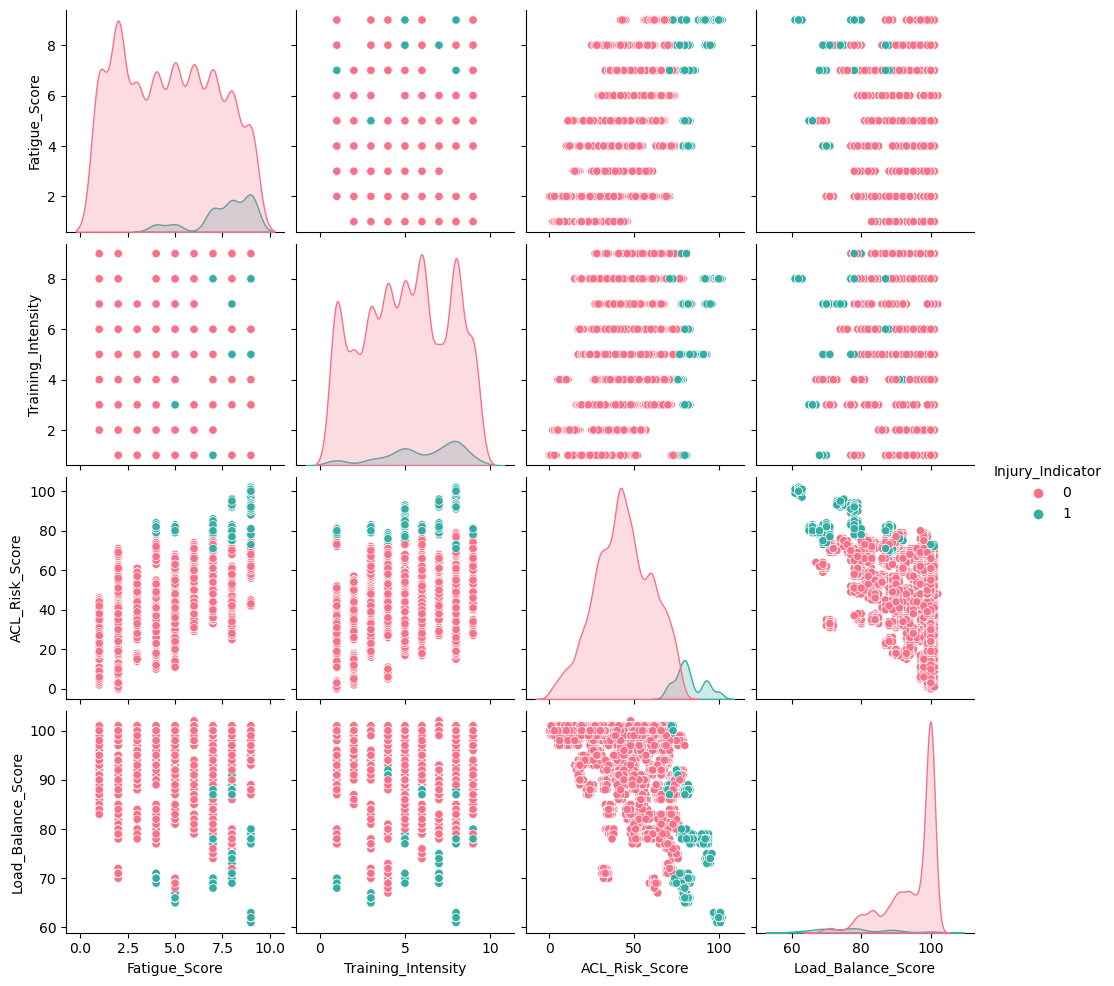

In [17]:
# Pairplot with hue based on Injury_Indicator
sns.pairplot(df_cleaned[
    ['Fatigue_Score', 'Training_Intensity', 'ACL_Risk_Score', 'Load_Balance_Score', 'Injury_Indicator']],
    hue='Injury_Indicator', palette='husl')
plt.show()


The above pairplot visualizes the relationships between four key features `Fatigue_Score, Training_Intensity, ACL_Risk_Score, and Load_Balance_Scor` and their association with the Injury_Indicator variable (0 = No Injury, 1 = Injury)

Injured athletes (Injury_Indicator = 1): Cluster at high fatigue, high intensity, and high ACL risk. Appear concentrated in low Load Balance Score regions.

The plot shows clear class separability, especially between:

* ACL_Risk_Score vs. Load_Balance_Score

* Fatigue_Score vs. Training_Intensity

These feature interactions support their inclusion in a predictive model and suggest potential benefits from:

    - Interaction terms

    - Nonlinear modeling techniques (e.g., decision trees, ensemble methods)


#### 3. Group Statistics by Categorical Columns

In [18]:
# Mean values by Position and Gender
grouped_stats = df_cleaned.groupby(['Position', 'Gender'])[
    ['Fatigue_Score', 'Performance_Score', 'ACL_Risk_Score']
].mean().round(2)
print(grouped_stats)


                 Fatigue_Score  Performance_Score  ACL_Risk_Score
Position Gender                                                  
Center   Female           4.24              75.09           42.88
         Male             5.29              69.12           50.85
Forward  Female           4.56              75.74           42.63
         Male             4.76              72.13           43.52
Guard    Female           5.09              77.59           48.82
         Male             5.93              76.42           52.26


The analysis above presents the average values of key performance and risk metrics, segmented by player position and gender

__1. Fatigue Score__

Across all positions, male athletes report higher fatigue scores than their female counterparts. The largest gap is observed among Centers, where males average 5.29 compared to 4.24 for females.


__2. Performance Score__

Female athletes consistently outperform males in terms of average performance score across all positions. The Guards position shows the most pronounced difference (approx. 6 points higher for females).

__3. ACL Risk Score__

Males have higher ACL Risk Scores in all positions, suggesting a higher predisposition to ACL-related injuries. The gap is particularly noticeable for Centers (an 8-point difference).

#### Summary
* Fatigue and ACL risk are higher in males regardless of position.

* Female players demonstrate higher average performance, particularly in Guard position.

These insights could guide personalized training and recovery programs, especially for injury prevention in male athletes and performance optimization for female athletes.

#### 4. Violin Plot for Distribution per Group

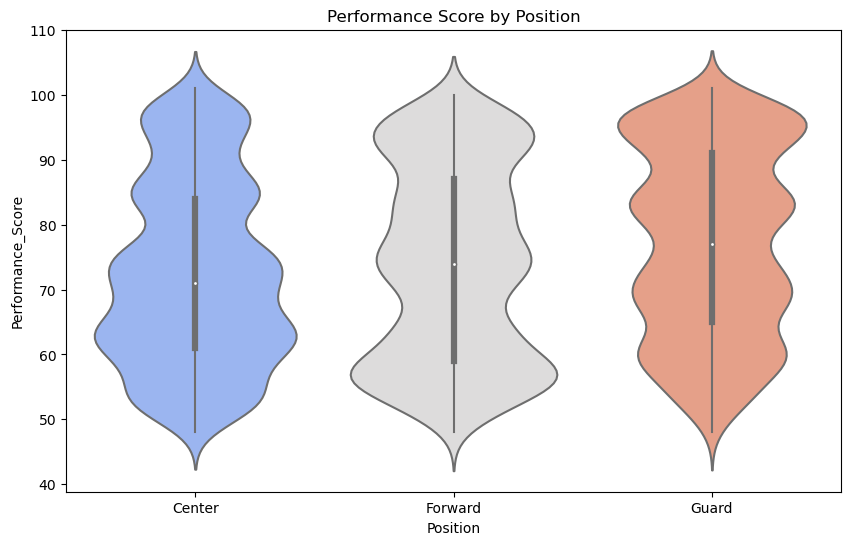

In [19]:
# Violin plot example
plt.figure(figsize=(10, 6))
sns.violinplot(x='Position', y='Performance_Score', data=df_cleaned, palette='coolwarm')
plt.title('Performance Score by Position')
plt.show()


#### 5. Feature Interactions (2D Scatter)

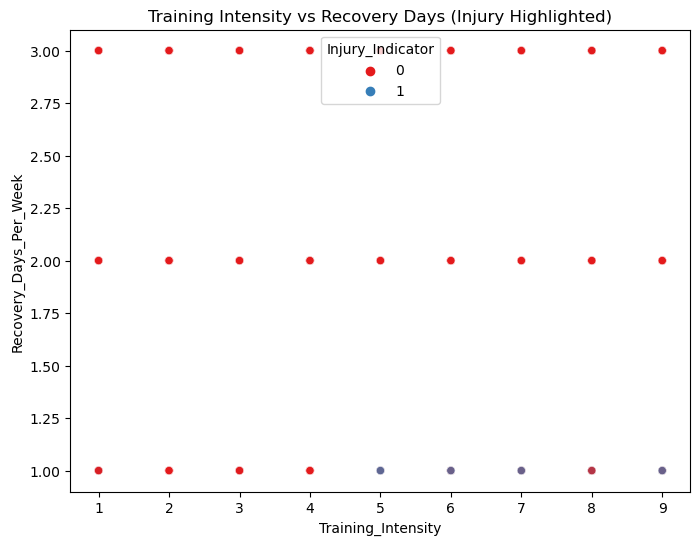

In [20]:
# Scatter plot for two features with color by Injury
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Training_Intensity',
    y='Recovery_Days_Per_Week',
    hue='Injury_Indicator',
    data=df_cleaned,
    palette='Set1',
    alpha=0.7
)
plt.title('Training Intensity vs Recovery Days (Injury Highlighted)')
plt.show()


#### 6. Check for Skewness

In [21]:
# Print skewness values
from scipy.stats import skew

skew_vals = df_cleaned.select_dtypes(include='number').apply(skew).sort_values(ascending=False)
print("Features with high skewness (possible transformation candidates):")
print(skew_vals[abs(skew_vals) > 1])


Features with high skewness (possible transformation candidates):
Injury_Indicator      3.337961
Load_Balance_Score   -1.348532
dtype: float64


#### 7. Target Leakage Check (Correlation to Injury)

In [22]:
# Sort features by correlation to Injury_Indicator
corr_to_injury = df_cleaned.corr(numeric_only=True)['Injury_Indicator'].sort_values(ascending=False)
print(corr_to_injury)


Injury_Indicator            1.000000
ACL_Risk_Score              0.525747
Fatigue_Score               0.293888
Training_Hours_Per_Week     0.132134
Training_Intensity          0.100912
Weight_kg                   0.065373
Team_Contribution_Score     0.039957
Height_cm                   0.022081
Performance_Score           0.020741
Age                         0.007806
Match_Count_Per_Week       -0.024583
Rest_Between_Events_Days   -0.044048
Recovery_Days_Per_Week     -0.262592
Load_Balance_Score         -0.494459
Name: Injury_Indicator, dtype: float64


#### 8. Class Imbalance Visualization using Pie Chart

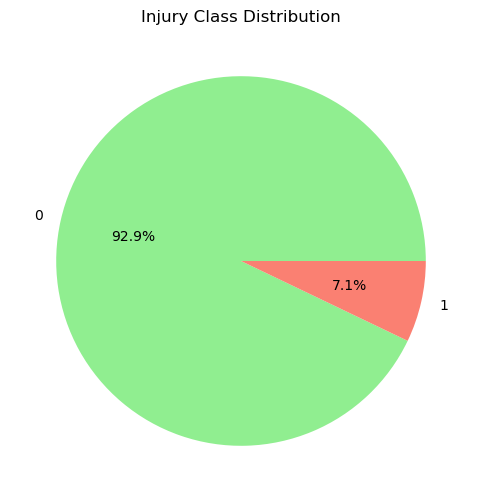

In [23]:
# Pie chart for injury indicator distribution
injury_counts = df_cleaned['Injury_Indicator'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(injury_counts, labels=injury_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Injury Class Distribution')
plt.show()


## 3. Feature Engineering Plan

We’ll tackle this in several steps:

1. Create Derived Features
    - BMI = Weight_kg / (Height_m)^2

    - Training_Load = Training_Intensity × Training_Hours_Per_Week

2. Encode Categorical Variables
    - One-hot encode Gender and Position

3. Normalize/Standardize Numerical Features
    - Scale numerical features (important for algorithms like logistic regression or SVM)



#### 1. Create Derived Features

In [24]:
# Convert height to meters
df_cleaned['Height_m'] = df_cleaned['Height_cm'] / 100

# Calculate BMI
df_cleaned['BMI'] = df_cleaned['Weight_kg'] / (df_cleaned['Height_m'] ** 2)

# Calculate Training Load
df_cleaned['Training_Load'] = df_cleaned['Training_Intensity'] * df_cleaned['Training_Hours_Per_Week']


In [25]:
df_cleaned.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator,Height_m,BMI,Training_Load
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0,1.95,26.035503,26
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,72,0,1.92,17.632378,112
2,A003,22,Male,164,83,Guard,8,8,2,1,3,6,59,61,100,62,0,1.64,30.859607,64
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,79,52,0,1.92,24.414062,13
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,52,84,49,0,1.73,26.395803,27


####  2. One-Hot Encode Categorical Variables

In [26]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Gender', 'Position'], drop_first=True)


In [27]:
df_encoded

,Athlete_ID,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,...,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator,Height_m,BMI,Training_Load,Gender_Male,Position_Forward,Position_Guard
0,A001,24,195,99,2,13,2,3,1,1,...,58,100,4,0,1.95,26.035503,26,False,False,False
1,A002,21,192,65,8,14,1,3,1,4,...,63,83,72,0,1.92,17.632378,112,True,True,False
2,A003,22,164,83,8,8,2,1,3,6,...,61,100,62,0,1.64,30.859607,64,True,False,True
3,A004,24,192,90,1,13,1,1,1,7,...,74,79,52,0,1.92,24.414062,13,False,False,True
4,A005,20,173,79,3,9,1,2,1,2,...,52,84,49,0,1.73,26.395803,27,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9236,A196,23,169,88,3,11,3,4,1,3,...,96,99,39,0,1.69,30.811246,33,False,False,True
9237,A197,21,184,95,8,5,3,4,2,5,...,62,100,55,0,1.84,28.060019,40,True,True,False
9238,A198,19,193,90,5,6,2,1,1,5,...,81,100,24,0,1.93,24.161722,30,False,False,False
9239,A199,19,165,56,9,7,2,3,1,9,...,81,97,62,0,1.65,20.569330,63,True,False,False


In [28]:
# Select numeric columns (excluding binary and already encoded features)
features_to_scale = [
    'Age', 'Height_cm', 'Weight_kg', 'Training_Intensity', 'Training_Hours_Per_Week',
    'Recovery_Days_Per_Week', 'Match_Count_Per_Week', 'Rest_Between_Events_Days',
    'Fatigue_Score', 'Performance_Score', 'Team_Contribution_Score', 'Load_Balance_Score',
    'ACL_Risk_Score', 'BMI', 'Training_Load'
]

scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])


In [29]:
threshold = 0.1
corr_matrix = df_encoded.corr(numeric_only=True)
high_corr_features = corr_matrix.index[abs(corr_matrix['Injury_Indicator']) > threshold].tolist()
high_corr_features.remove('Injury_Indicator')
X_selected = df_encoded[high_corr_features]
Y = df_encoded['Injury_Indicator']

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=42)


## Model Development

In [31]:
# 1. Logistic Regression (simple baseline)
model1 = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)
model1.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [32]:
# 2. Decision Tree Classifier (simple tree)
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
# 3. Random Forest Classifier (default random forest)
model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# 4. K-Nearest Neighbors (basic kNN)
model4 = KNeighborsClassifier(n_neighbors=5)
model4.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
# 5. Gradient Boosting Classifier (classic boosting)
model5 = GradientBoostingClassifier(random_state=42)
model5.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [36]:
# 6. Support Vector Classifier (linear kernel)
model6 = SVC(kernel='linear', probability=True, random_state=42)
model6.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [37]:
# 8. Collect all models in a list
models = [model1, model2, model3, model4, model5, model6]


Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1718
           1       0.90      0.87      0.88       131

    accuracy                           0.98      1849
   macro avg       0.94      0.93      0.94      1849
weighted avg       0.98      0.98      0.98      1849



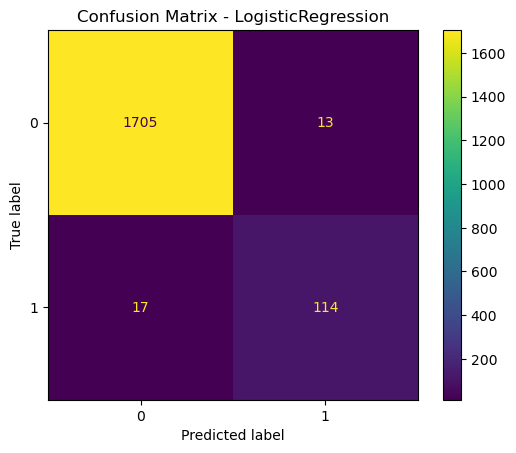


Model: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1718
           1       0.99      1.00      1.00       131

    accuracy                           1.00      1849
   macro avg       1.00      1.00      1.00      1849
weighted avg       1.00      1.00      1.00      1849



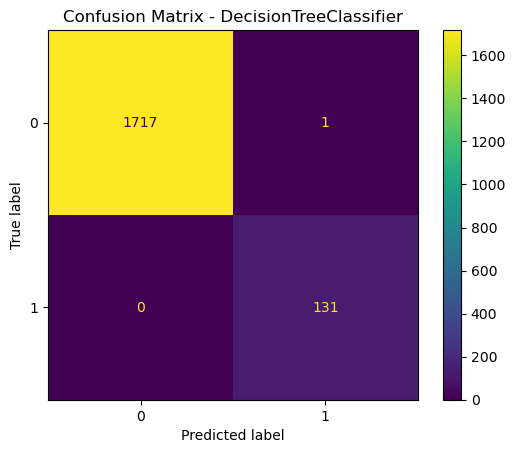


Model: RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1718
           1       1.00      1.00      1.00       131

    accuracy                           1.00      1849
   macro avg       1.00      1.00      1.00      1849
weighted avg       1.00      1.00      1.00      1849



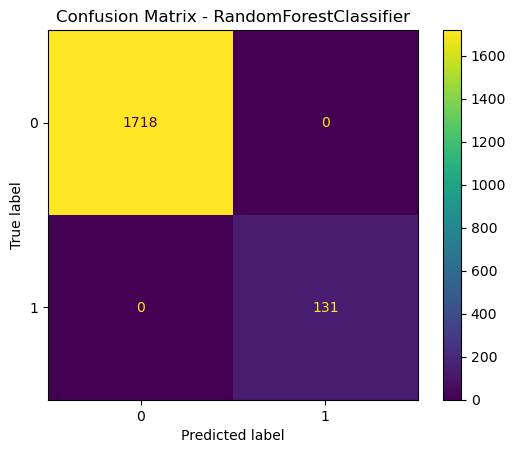


Model: KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1718
           1       1.00      1.00      1.00       131

    accuracy                           1.00      1849
   macro avg       1.00      1.00      1.00      1849
weighted avg       1.00      1.00      1.00      1849



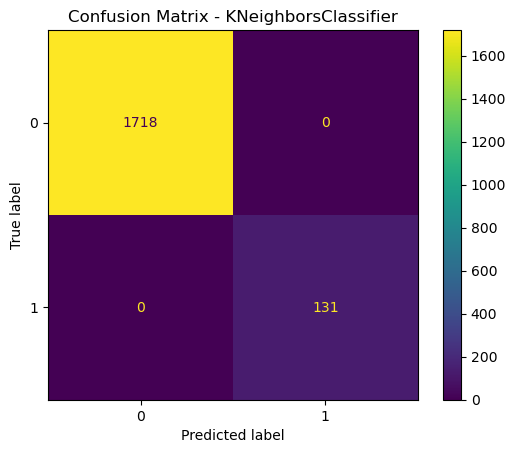


Model: GradientBoostingClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1718
           1       1.00      1.00      1.00       131

    accuracy                           1.00      1849
   macro avg       1.00      1.00      1.00      1849
weighted avg       1.00      1.00      1.00      1849



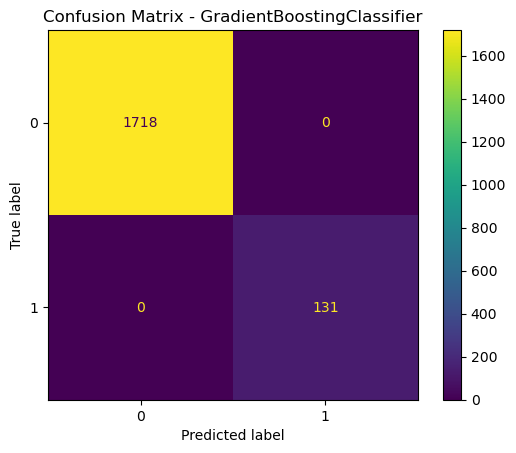


Model: SVC
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1718
           1       0.89      0.89      0.89       131

    accuracy                           0.98      1849
   macro avg       0.94      0.94      0.94      1849
weighted avg       0.98      0.98      0.98      1849



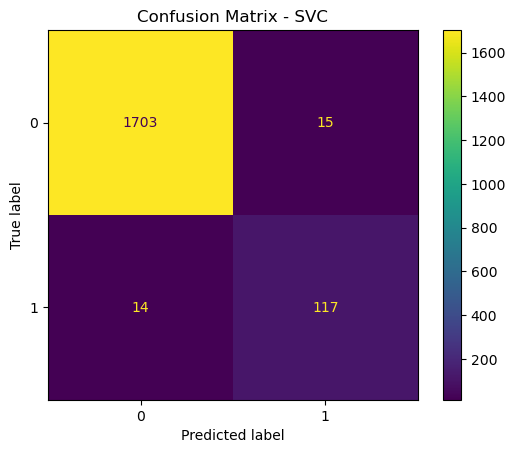

In [38]:
# 1. Define the evaluation function
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = []

    for model in models:
        model_name = model.__class__.__name__

        # Predict on test set
        y_pred = model.predict(X_test)
        
        # Try to predict probabilities for ROC-AUC if possible
        try:
            y_proba = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_proba)
        except AttributeError:
            roc_auc = "N/A"  # Some models like SVC without probability=True

        # Collect results
        results.append({
            'Model': model_name,
            'Train Accuracy %': round(model.score(X_train, y_train) * 100, 2),
            'Test Accuracy %': round(model.score(X_test, y_test) * 100, 2),
            'ROC AUC Score': roc_auc if roc_auc == "N/A" else round(roc_auc, 4)
        })

        # Display the confusion matrix
        print(f"\nModel: {model_name}")
        print(classification_report(y_test, y_pred))
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.title(f"Confusion Matrix - {model_name}")
        plt.show()

    return pd.DataFrame(results)

# 2. Run the evaluation
results_df = evaluate_models(models, X_train, y_train, X_test, y_test)

In [39]:
# 3. Display summarized results
display(results_df)

,Model,Train Accuracy %,Test Accuracy %,ROC AUC Score
0,LogisticRegression,97.74,98.38,0.9958
1,DecisionTreeClassifier,100.00,99.95,0.9997
2,RandomForestClassifier,100.00,100.00,1.0000
3,KNeighborsClassifier,100.00,100.00,1.0000
4,GradientBoostingClassifier,99.97,100.00,1.0000
5,SVC,98.04,98.43,0.9956


In [40]:
# 1. Retrain models with regularization so as to avoid overfitting

# Logistic Regression with  regularization (lower C)
model1 = LogisticRegression(C=0.1, solver='liblinear', random_state=42)

In [41]:
# Decision Tree with shallow depth
model2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [42]:
# Random Forest with depth control
model3 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=4, random_state=42)

In [43]:
# # HistGradientBoosting with early stopping
# model4 = HistGradientBoostingClassifier(max_iter=100, early_stopping=True, random_state=42)

In [44]:
# KNN with more neighbors to reduce variance
model4 = KNeighborsClassifier(n_neighbors=10, p=2, weights='distance')

In [45]:
# Gradient Boosting with lower learning rate
model5 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=200, max_depth=3, random_state=42)

In [46]:
# Support Vector Classifier with linear kernel
model6 = SVC(kernel='linear', C=0.5, probability=True, random_state=42)

In [47]:
# 2. List of models
models = [model1, model2, model3, model4, model5, model6]

# 3. Function to evaluate cross-validation scores
def cross_validate_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = []
    for model in models:
        model_name = model.__class__.__name__
        # Train the model
        model.fit(X_train, y_train)
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        mean_cv_score = cv_scores.mean()
        # Test set accuracy
        test_accuracy = model.score(X_test, y_test)
        # Append results
        results.append({
            'Model': model_name,
            'CV Mean Accuracy %': round(mean_cv_score * 100, 2),
            'Test Accuracy %': round(test_accuracy * 100, 2)
        })
    return results

# 4. Run evaluation
results_df = cross_validate_and_evaluate(models, X_train, y_train, X_test, y_test)

# 5. Display results
import pandas as pd
results_df = pd.DataFrame(results_df)
display(results_df)

,Model,CV Mean Accuracy %,Test Accuracy %
0,LogisticRegression,97.11,97.78
1,DecisionTreeClassifier,99.50,99.73
2,RandomForestClassifier,99.97,100.00
3,KNeighborsClassifier,100.00,100.00
4,GradientBoostingClassifier,99.95,100.00
5,SVC,98.02,98.43


In [48]:
# Sort by Test Accuracy
print(" Models ranked by Test Accuracy:")
display(results_df.sort_values(by='Test Accuracy %', ascending=False))

# If ROC AUC scores are in your earlier DataFrame:
if 'ROC AUC Score' in results_df.columns:
    print(" Models ranked by ROC AUC Score:")
    results_df_filtered = results_df[results_df['ROC AUC Score'] != 'N/A']
    display(results_df_filtered.sort_values(by='ROC AUC Score', ascending=False))


 Models ranked by Test Accuracy:


,Model,CV Mean Accuracy %,Test Accuracy %
2,RandomForestClassifier,99.97,100.00
3,KNeighborsClassifier,100.00,100.00
4,GradientBoostingClassifier,99.95,100.00
1,DecisionTreeClassifier,99.50,99.73
5,SVC,98.02,98.43
0,LogisticRegression,97.11,97.78


In [49]:
import pandas as pd

feature_names = X_selected.columns
importances = model3.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("🔍 Feature Importances:")
display(importance_df)

# Optionally keep top N features
top_features = importance_df['Feature'].head(10).tolist()
X_selected_top = df_encoded[top_features]


🔍 Feature Importances:


,Feature,Importance
5,ACL_Risk_Score,0.489731
4,Load_Balance_Score,0.183074
3,Fatigue_Score,0.081721
6,Training_Load,0.077245
1,Training_Hours_Per_Week,0.058137
2,Recovery_Days_Per_Week,0.056548
0,Training_Intensity,0.053544


In [50]:
# Logistic Regression Feature Importance (absolute coefficients)
import numpy as np
import pandas as pd

feature_names = X_selected.columns
coefficients = model1.coef_[0]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)  # Take absolute value
}).sort_values(by='Importance', ascending=False)

print("🔍 Logistic Regression Coefficient Importances:")
display(importance_df)

# Top N features
top_features = importance_df['Feature'].head(10).tolist()
X_selected_top = df_encoded[top_features]


🔍 Logistic Regression Coefficient Importances:


,Feature,Importance
5,ACL_Risk_Score,2.501587
4,Load_Balance_Score,0.980718
6,Training_Load,0.573639
0,Training_Intensity,0.514662
3,Fatigue_Score,0.391214
2,Recovery_Days_Per_Week,0.331473
1,Training_Hours_Per_Week,0.181719


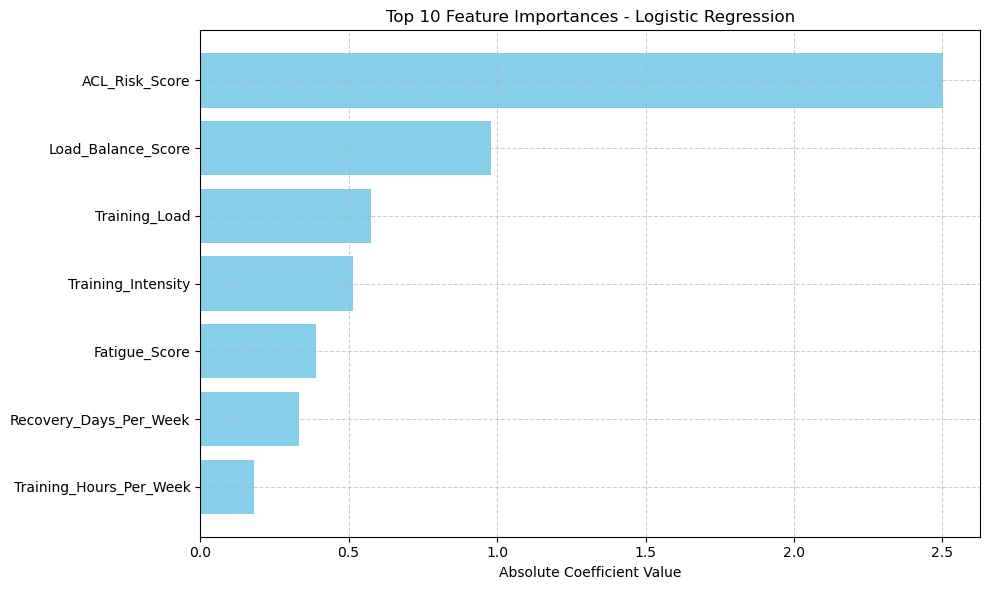

In [51]:
import matplotlib.pyplot as plt

# Plot top features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10)[::-1], importance_df['Importance'].head(10)[::-1], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Feature Importances - Logistic Regression')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Retraining our Model Using the selected Features

In [52]:
top_features = importance_df['Feature'].head(10).tolist()
X_selected_top = df_encoded[top_features]


#### Split the Data Again (Using Only Top Features)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale the selected top features
scaler = StandardScaler()
X_scaled_top = scaler.fit_transform(X_selected_top)

# Train-test split with stratification
X_train_top, X_test_top, y_train, y_test = train_test_split(
    X_scaled_top, Y, test_size=0.2, stratify=Y, random_state=42
)


In [54]:
# Retrain
model_top = LogisticRegression(C=1.0, solver='liblinear', random_state=42)
model_top.fit(X_train_top, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [55]:
# Predict and evaluate
y_pred_top = model_top.predict(X_test_top)
y_proba_top = model_top.predict_proba(X_test_top)[:, 1]

# Report
print("Logistic Regression (Top Features) Classification Report:")
print(classification_report(y_test, y_pred_top))

Logistic Regression (Top Features) Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1718
           1       0.90      0.87      0.88       131

    accuracy                           0.98      1849
   macro avg       0.94      0.93      0.94      1849
weighted avg       0.98      0.98      0.98      1849



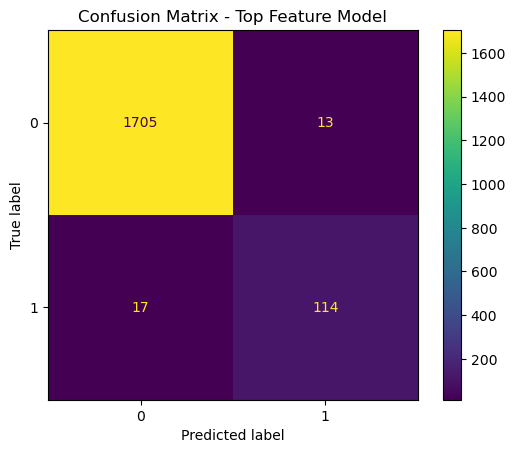

In [56]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_top)
plt.title("Confusion Matrix - Top Feature Model")
plt.show()

ROC AUC Score: 0.9958


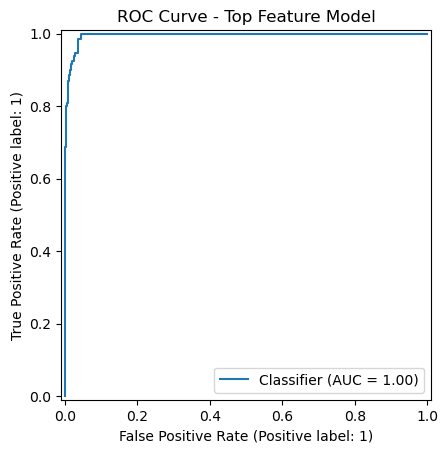

In [57]:
# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba_top)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_top)
plt.title("ROC Curve - Top Feature Model")
plt.show()

In [58]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


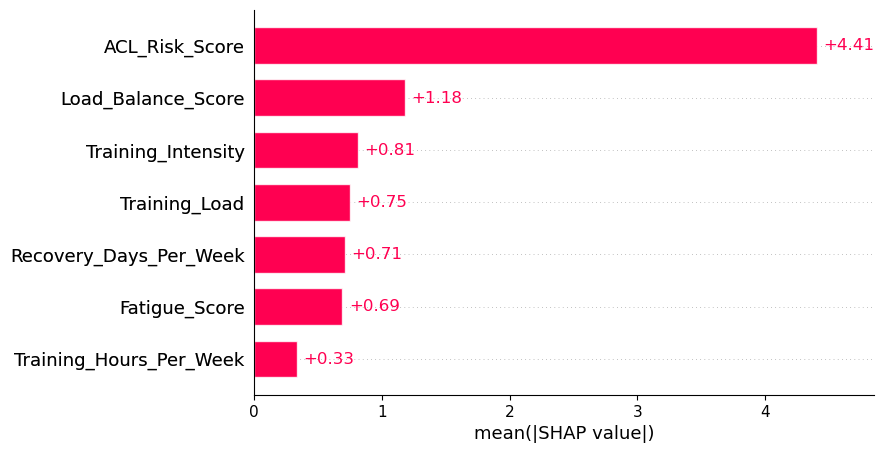

In [59]:
import shap

# SHAP requires background data in raw (unscaled) format
# We'll use the top 7 features (raw, unscaled) for interpretation
X_shap = X_selected_top  # raw DataFrame

# Initialize SHAP explainer for linear models
explainer = shap.Explainer(model_top, X_shap)
shap_values = explainer(X_shap)

# Summary plot (bar for global importance)
shap.plots.bar(shap_values, max_display=7)


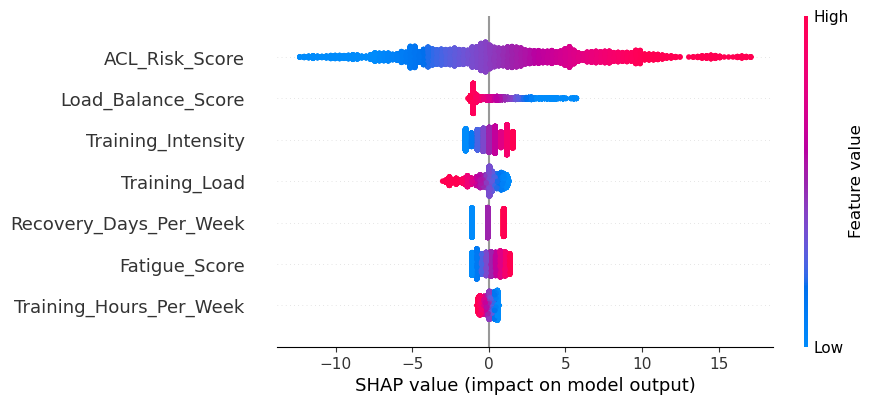

In [60]:
shap.plots.beeswarm(shap_values, max_display=7)


## Save and Load the Final Model

In [61]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


### Save the Trained Model + Scaler

In [62]:
import joblib

# Save logistic regression model
joblib.dump(model_top, "logistic_model_top7.pkl")

# Save scaler (used to transform features)
joblib.dump(scaler, "scaler_top7.pkl")

print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.


In [63]:
import joblib

In [64]:
# Create a new sample (one row, same feature names as top_features)

X_new_data = pd.DataFrame([{
    'ACL_Risk_Score': 400,
    'Load_Balance_Score': 200,
    'Training_Intensity':10,
    'Training_Load': 250,
    'Recovery_Days_Per_Week': 5,
    'Fatigue_Score':15,
    'Training_Hours_Per_Week': 40
}])

In [65]:
# Load model and scaler
loaded_model = joblib.load("logistic_model_top7.pkl")
loaded_scaler = joblib.load("scaler_top7.pkl")

# Example: Use it for prediction
X_new_scaled = loaded_scaler.transform(X_new_data[top_features])
prediction = loaded_model.predict(X_new_scaled)


In [66]:
print(prediction)

[1]


In [67]:
df.describe()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000
mean,21.170000,180.809200,77.460600,5.105000,11.314500,1.985000,2.385000,1.975000,4.919900,74.466300,72.63370,93.390700,46.463800,0.07000
std,1.997874,11.508816,12.436258,2.492909,4.429916,0.809222,1.151915,0.815133,2.554121,14.610483,14.41646,8.656289,18.915778,0.25516
min,18.000000,158.000000,54.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,48.000000,48.00000,61.000000,0.000000,0.00000
25%,19.000000,171.000000,67.000000,3.000000,7.000000,1.000000,1.000000,1.000000,3.000000,61.000000,60.00000,89.000000,33.000000,0.00000
50%,21.000000,183.000000,78.000000,5.000000,11.000000,2.000000,2.000000,2.000000,5.000000,74.000000,72.00000,98.000000,45.000000,0.00000
75%,23.000000,191.000000,89.000000,7.000000,15.000000,3.000000,3.000000,3.000000,7.000000,87.000000,85.00000,100.000000,60.000000,0.00000
max,24.000000,201.000000,101.000000,9.000000,20.000000,3.000000,4.000000,3.000000,9.000000,101.000000,101.00000,102.000000,102.000000,1.00000


In [68]:
df_cleaned.describe()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator,Height_m,BMI,Training_Load
count,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.00000,9241.000000,9241.000000
mean,21.176496,180.821989,77.426144,5.111568,11.292068,1.983660,2.384049,1.977600,4.925008,74.431555,72.621902,93.418786,46.462612,0.071096,1.80822,23.970684,57.469105
std,1.998244,11.518027,12.439072,2.490066,4.430276,0.808674,1.153200,0.815327,2.562404,14.607531,14.400784,8.655525,18.954341,0.256999,0.11518,5.019158,38.384779
min,18.000000,158.000000,54.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,48.000000,48.000000,61.000000,0.000000,0.000000,1.58000,14.687315,5.000000
25%,19.000000,171.000000,67.000000,3.000000,7.000000,1.000000,1.000000,1.000000,3.000000,61.000000,60.000000,89.000000,33.000000,0.000000,1.71000,20.010416,27.000000
50%,21.000000,183.000000,78.000000,5.000000,11.000000,2.000000,2.000000,2.000000,5.000000,74.000000,72.000000,98.000000,45.000000,0.000000,1.83000,23.589835,49.000000
75%,23.000000,191.000000,89.000000,7.000000,15.000000,3.000000,3.000000,3.000000,7.000000,86.000000,85.000000,100.000000,60.000000,0.000000,1.91000,27.064052,80.000000
max,24.000000,201.000000,101.000000,9.000000,20.000000,3.000000,4.000000,3.000000,9.000000,101.000000,101.000000,102.000000,102.000000,1.000000,2.01000,39.555397,180.000000
